In [23]:
#Librerias 

from functions_py import *
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma
import skimage.measure as sk

plt.rcParams.update({
    "image.origin": "lower",
    "image.aspect": 1,
    #"text.usetex": True,
    "grid.alpha": .5,
    "axes.linewidth":2,
    "lines.linewidth" : 1,
    "font.size":    15.0,
    "xaxis.labellocation": 'right',  # alignment of the xaxis label: {left, right, center}
    "yaxis.labellocation": 'top',  # alignment of the yaxis label: {bottom, top, center}
    "xtick.top":           True ,  # draw ticks on the top side
    "xtick.major.size":    8    ,# major tick size in points
    "xtick.minor.size":    4      ,# minor tick size in points
    "xtick.direction":     'in',
    "xtick.minor.visible": True,
    "ytick.right":           True ,  # draw ticks on the top side
    "ytick.major.size":    8    ,# major tick size in points
    "ytick.minor.size":    4      ,# minor tick size in points
    "ytick.direction":     'in',
    "ytick.minor.visible": True,
    "ytick.major.width":   2   , # major tick width in points
    "ytick.minor.width":   1 ,
    "xtick.major.width":   2   , # major tick width in points
    "xtick.minor.width":   1 ,
    "legend.framealpha": 0 ,
    "legend.loc": 'best',

})


In [2]:
path='/home/oem/datosFits/MicrochipTest_Marzo/datos/16JUN23/proc_skp_m-009_microchip_vTested_T_170__seq_HA_NSAMP_4_NROW_1300_NCOL_1200_EXPOSURE_0_NBINROW_1_NBINCOL_1_img_02.fits'

Filename: /home/oem/datosFits/MicrochipTest_Marzo/datos/16JUN23/proc_skp_m-009_microchip_vTested_T_170__seq_HA_NSAMP_4_NROW_1300_NCOL_1200_EXPOSURE_0_NBINROW_1_NBINCOL_1_img_02.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     165   (1200, 1300)   float32   
  1                1 ImageHDU       164   (1200, 1300)   float32   
  2                1 ImageHDU       164   (1200, 1300)   float32   
  3                1 ImageHDU       164   (1200, 1300)   float32   
None
----------------


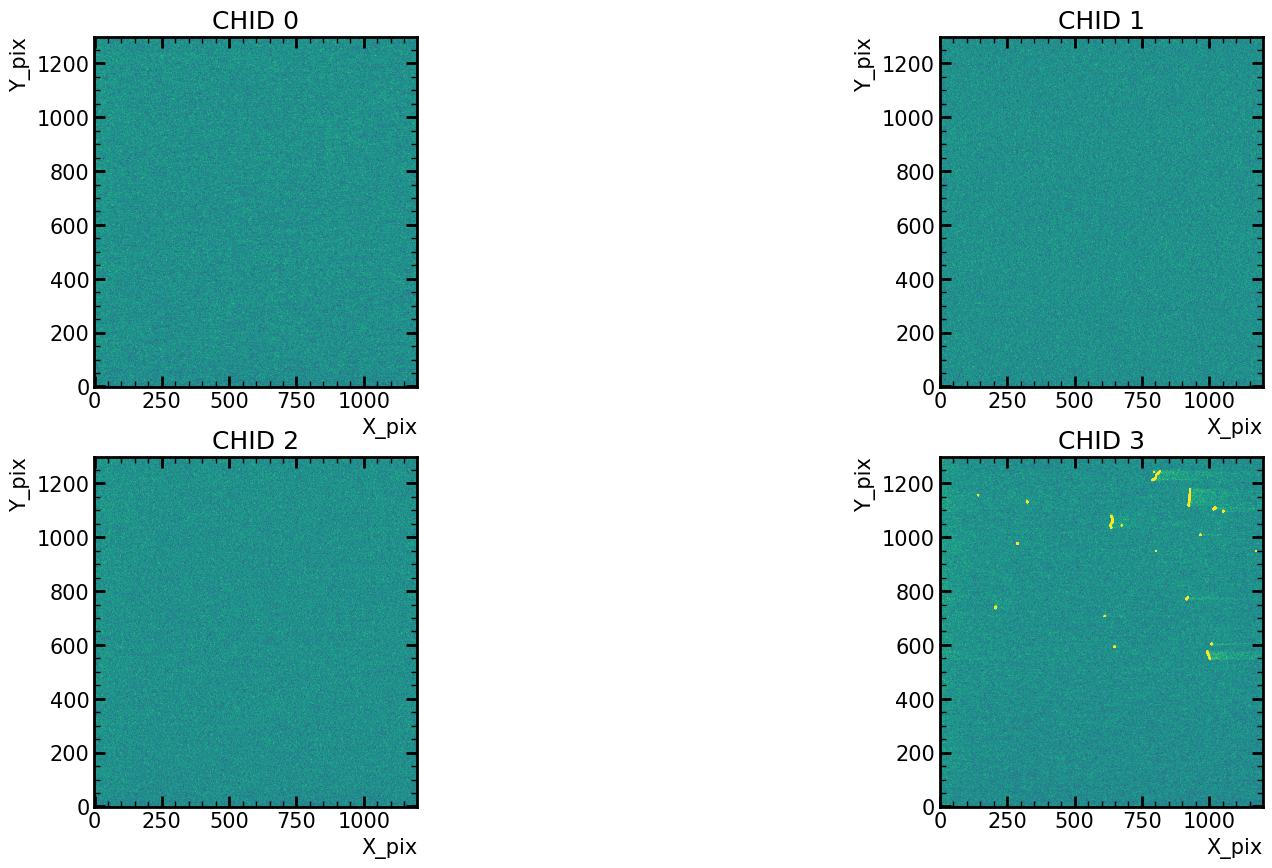

In [3]:
hdu_list = fits.open(path)
print(hdu_list.info())
print('----------------')
# hdu_list[0].header
plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(hdu_list[i].data-np.median(hdu_list[i].data),vmin=-800,vmax=800)
    plt.title('CHID '+str(i))
    plt.ylabel('Y_pix')
    plt.xlabel('X_pix')
plt.show()

In [4]:
data=hdu_list[3].data #En este archivo solo tenemos trazas en la extension CHID 3
data_cal=data/197 #ganancia medida previamente 

Text(0, 1, 'Counts [pixels]')

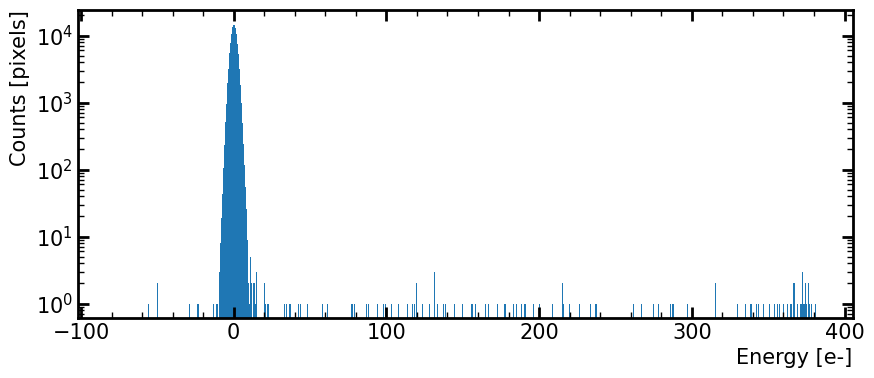

In [5]:

fig, ax = plt.subplots(figsize=(10,4))
# ax.figure(figsize=(10,10))
hist, bin_edges = np.histogram(data_cal.flatten(), bins=1000000)
offset = bin_edges[np.argmax(hist)]   #sabemos en que valor en ADUs esta centrado el pico de
data_cal=data_cal-offset              # 0 [e-] para despues centrar el histograma
ax.hist(data_cal.flatten(), bins='auto', log=True)
ax.set_xlabel('Energy [e-]')
ax.set_ylabel('Counts [pixels]')


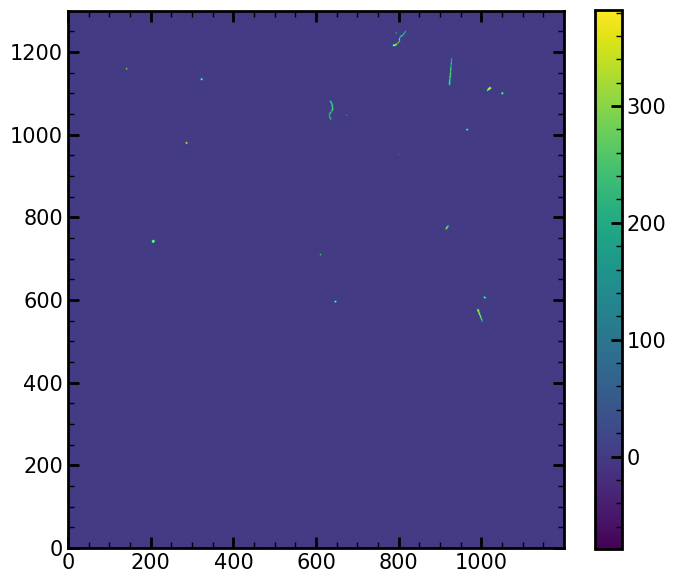

In [15]:

plt.figure(figsize=(8,7)) #imagen calibrada 
plt.imshow(data_cal, cmap='viridis', vmax=data_cal.max(),vmin=data_cal.min())
plt.colorbar()


# Generacion de labels
Utilizando ndimage.label damos como parametro los datos.
> Un objeto similar a una matriz para ser etiquetado. Cualquier valor distinto de cero en la entrada se cuenta como características y los valores cero se consideran el fondo.

despues el tipo de estructura, 
> Un elemento de estructuración que define conexiones de entidades. la estructura debe ser centrosimétrica (ver Notas). Si no se proporciona ningún elemento estructurante, automáticamente se genera uno con una conectividad al cuadrado igual a uno. Es decir, para una matriz de entrada 2-D. 

[1,1,1],[1,1,1],[1,1,1]


In [55]:
label,num_objects=ndimage.label(data_cal>14,structure=[[1,1,1],[1,1,1],[1,1,1]])
num_objects


19

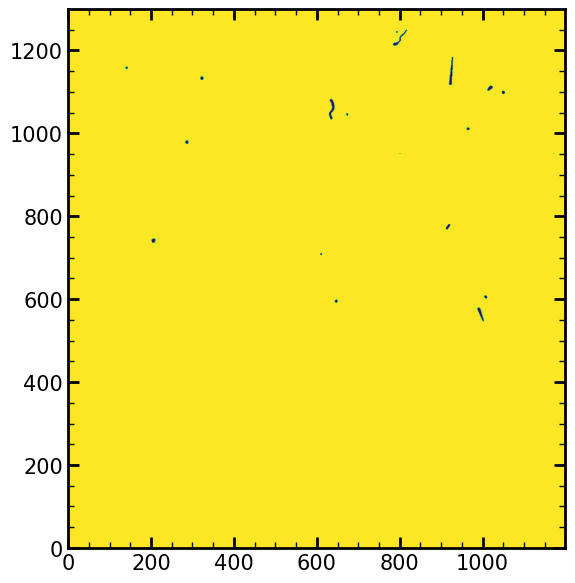

In [56]:
plt.figure(figsize=(8,7))
plt.imshow(label==0, cmap='viridis', vmin=0,vmax=1) # Label = 0 es el fondo
plt.show()

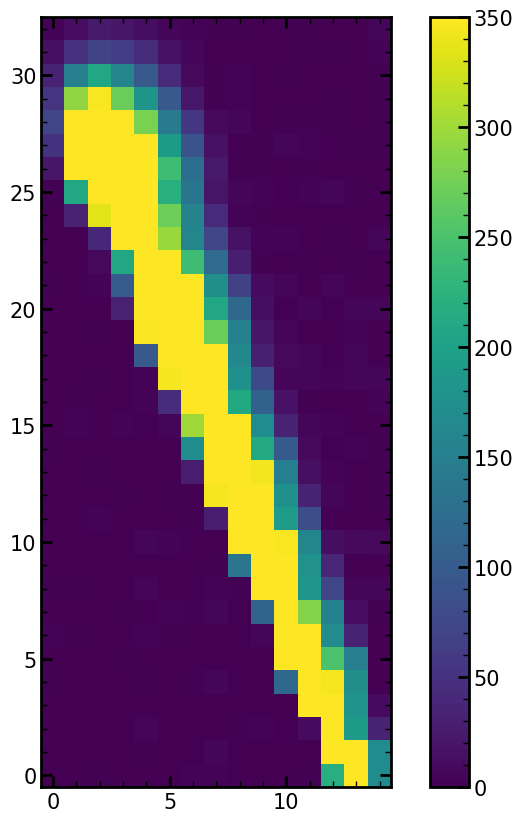

In [58]:

plt.figure(figsize=(10,10))
evento=data_cal[ndimage.find_objects(label)[0]]
plt.imshow(evento, cmap='viridis', vmax=350,vmin=0) #vmax lo sacamos del histograma, aparentemente es el maximo valor [e-] dentro de la imagen
plt.colorbar()
plt.show()